<a href="https://colab.research.google.com/github/Panperception/SCC022/blob/main/Week01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload the data files and the setup file from your local disk to the folder in the left (click on the folder button to see)
### Files needed:
 1. disease-cases.csv
 2. NOTT_2015.csv
 3. requirements.txt



## Install requirements


In [5]:
!pip install -r requirements.txt

### Run the solution codes

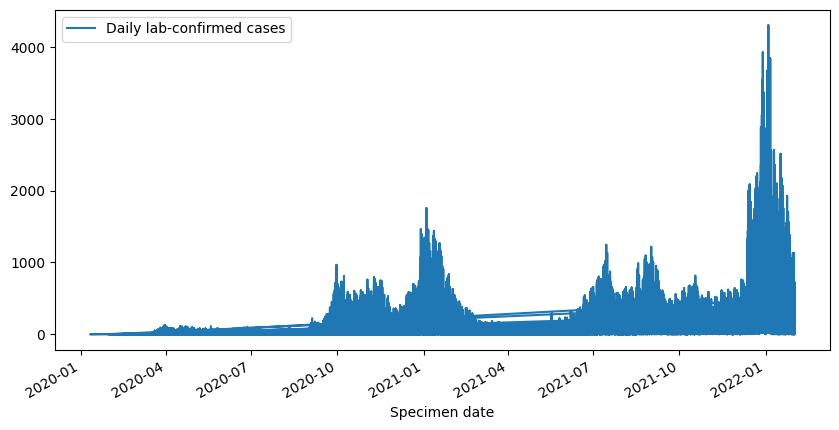

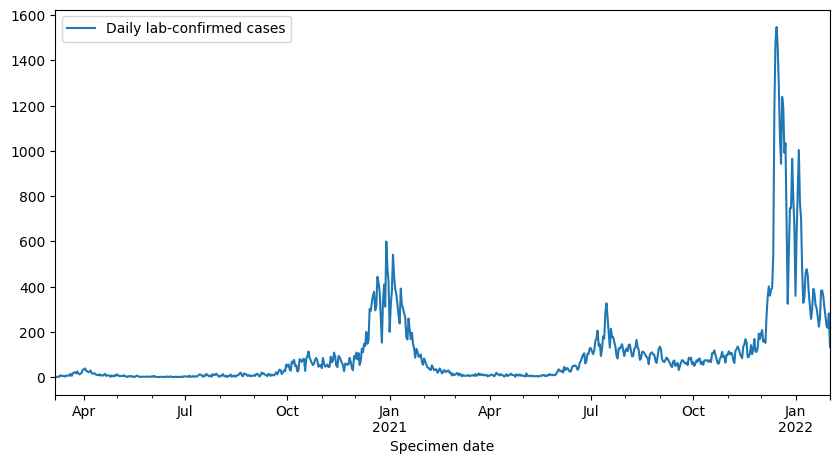

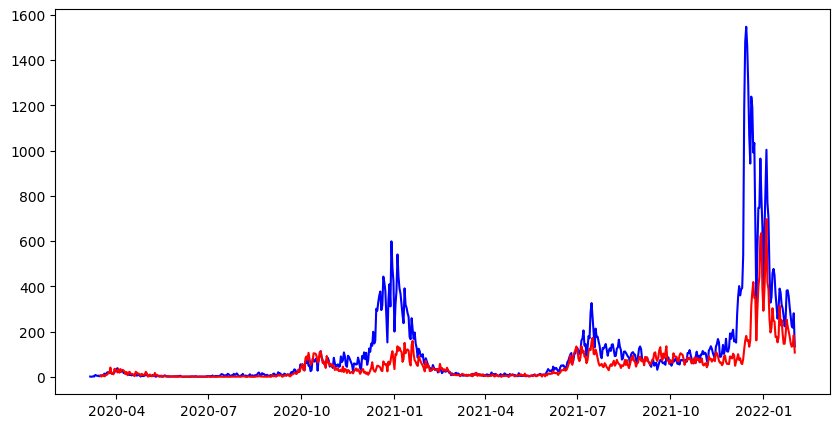

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
plt.interactive(True)
cvd = pd.read_csv("disease-cases.csv")
cvd

pd.options.display.max_rows = 10
pd.options.display.min_rows = 5
cvd

cvd['Specimen date'] = pd.to_datetime(cvd['Specimen date'], dayfirst=True)
cvd

cvd.describe()

cvd.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))

cvd_london = cvd[cvd['Area name'] == 'London']
cvd_london

cvd_london.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))

cvd_london = cvd_london.sort_values(by='Specimen date')
cvd_london

cvd_lancaster = cvd[cvd['Area name'] == 'Lancaster']
plt.figure(figsize=(10, 5))
plt.plot(cvd_london["Specimen date"], cvd_london["Daily lab-confirmed cases"], 'b')
plt.plot(cvd_lancaster["Specimen date"], cvd_lancaster["Daily lab-confirmed cases"], 'r')
plt.show()
